<a href="https://colab.research.google.com/github/GDS-Education-Community-of-Practice/DSECOP/blob/rmastand/01_intro_to_histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Here are some necessary packages that we need to import to run this notebook

import numpy as np
import matplotlib.pyplot as plt
plt. rcParams["figure.figsize"] = (10, 6)

from google.colab import drive 
drive.mount("/content/drive/")

import os
os.chdir("/content/drive/My Drive/DSECOP/Colab Notebooks/")
!pwd

Mounted at /content/drive/
/content/drive/My Drive/DSECOP/Colab Notebooks


# Histograms as a tool for data visualization.

In this notebook, we'll learn how *histograms* can be used as a tool to visualize large datasets.

## What does a histogram represent?

Virtually all data collection in physics boils down to writing numbers that represent some sort of measurement. We then want to convert the collection of numbers (the *dataset*) into a representation that is easily analyzable. This generally involves converting the numbers into a *plot*.

One type of plot is a *histogram*. Histograms are most useful when we have a large number of measurements of the same quantity that were taken under the same conditions. As an example, consider this collection of histograms [produced by the ATLAS experiment at the LHC in 2012](https://arxiv.org/abs/1207.7214).

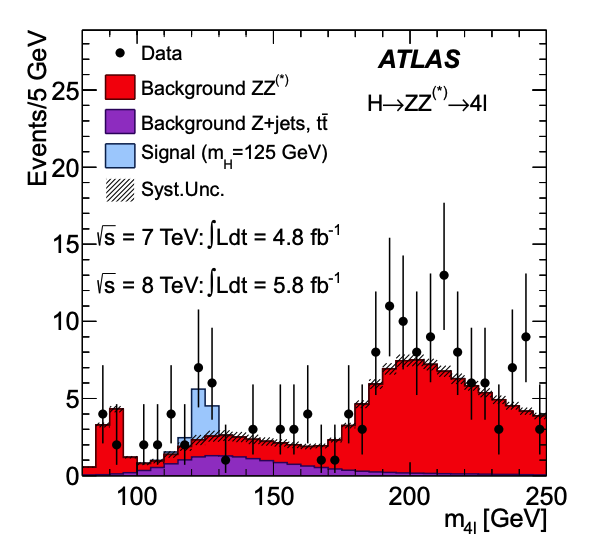

This experiment detected decays of proton-proton collisions that resulted in 4 lepton. For each decay, a measurement was made of the mass of a mother particle that could have directly produced the 4 leptons. The candidate mother particle masses were histogrammed. Note that there is a bump at $m_{4l}$ = 125 GeV, which indicated the existence of a mystery particle...

---

A histogram can be thought of as representing the *probability distribution* of a given observable. (We'll show this later on.) At a glance, we can see the most probable values for the observable, or how evenly distributed or clumped the values are. 


## Creating histograms from numbers

Let's try to create our own histogram.

You are gifted a sample of Uranium-234 for your birthday. You want to see if you can pick up radioactive emissions from the sample, so you grab your trusty Geiger counter and place it near the uranium.

Every minute, you record the number of "clicks" that the Geiger counter makes. You store the data in text file ```counts_dataset_00.txt```, separating each measurement with a comma.

**Activity:** Write a function to read in the dataset into a ```np.array``` of numbers, ```num_clicks_per_minute```. Print out the first few values of the dataset.

In [ ]:
dataset_location = "counts_dataset_00.txt"

def read_in_dataset(file_loc):

  with open(file_loc, "r") as infile:
    dataset = infile.read().split(",")
    num_clicks_per_minute = np.array([int(x) for x in dataset if x != " "])

    return num_clicks_per_minute

num_clicks_per_minute = read_in_dataset(dataset_location)

print(num_clicks_per_minute[:10])

[14 14  9 10 13 14 13  9 15 14]


It's very hard to gain any meaning from this list of numbers. So let's make this data into a histogram.

First, we need to define how we're going to divide the dataset into intervals, or *bins*. Each histogram bin is defined by two numbers, a *left edge* and a *right edge*. A point in a dataset is assigned to a given bin if it falls between the two edge values. Note that histogram bin edges never overlap each other, so there is no ambiguity about where a given data point is binned. 

**Activity:** Write a function that bins the data in ```num_clicks_per_minute```. 

In [ ]:
def bin_data(dataset, lower_bound, upper_bound, num_bins):

  # Define your bin edges here
  bin_edges = np.linspace(lower_bound, upper_bound, num_bins)
  bin_width = bin_edges[1] - bin_edges[0]

  # Calculate the center positions of each bin (this will be helpful later!)
  bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

  # Define a dictionary here
  binned_data = {}

  for left_edge_i in bin_edges[:-1]:
    binned_data[left_edge_i] = 0

  # Bin the data
  for data_point in dataset:
    for left_edge_i in bin_edges[:-1]:
      if (data_point >= left_edge_i) and ( data_point < left_edge_i + bin_width):
        binned_data[left_edge_i] += 1

  return binned_data, bin_edges, bin_centers


clicks_per_minute_binned, clicks_per_minute_bin_edges, clicks_per_minute_bin_centers = bin_data(num_clicks_per_minute, -.5, 30.5, 32)



**Activity:** Write a function that creates a histogram of the binned data in ```num_clicks_per_minute``` using ```plt.bar()```.

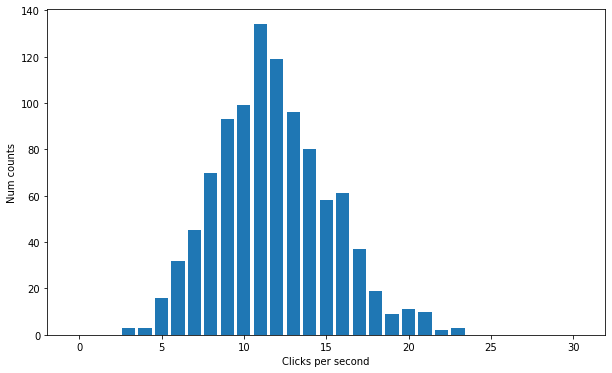

In [ ]:
clicks_per_minute_counts = list(clicks_per_minute_binned.values())

plt.figure()
plt.bar(clicks_per_minute_bin_centers, clicks_per_minute_counts)
plt.xlabel("Clicks per second")
plt.ylabel("Num counts")
plt.show()

### Built-in functions to make histograms

In practice, it is much more efficient to use preexisting histogramming tools than to write our own code every time. One of the most common function to do this is ```plt.hist()```. 

This function takes two main arguments: 

1. A ```np.array``` (or ```list```) of the data to be binned. 
2. ```bins```: A ```np.array```(or ```list```) of bin edges, or an ```int``` of the number of bins (```plt``` will automatically set the bin edges for you!). 

The function will automatically plot the histogram. It also returns a list of the counts in each histogram bin.

You can read more about ```plt.hist()``` [here](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html).

**Activity:** Use ```plt.hist()``` to remake the plot shown above. Don't forget to label your axes!

*Note*: In some cases, you might prefer to use ```numpy.histogram()```. This function is essentially identical to ```plt.hist()```, except it doesn't automatically plot the histogram.

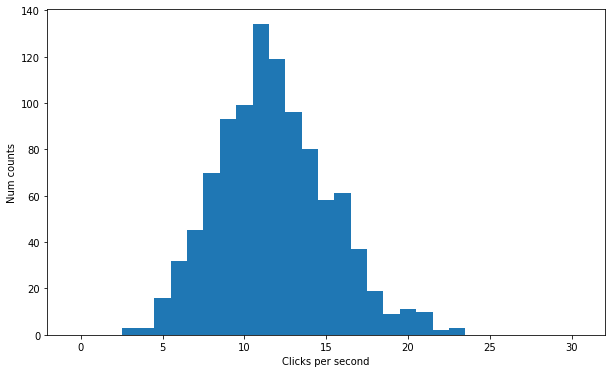

In [ ]:
plt.figure()
plt.hist(num_clicks_per_minute, bins = clicks_per_minute_bin_edges)
plt.xlabel("Clicks per second")
plt.ylabel("Num counts")
plt.show()

## Histograms as probability distributions

We said earlier that histograms can be interpreted as probability distributions for a given observable. Here's how we can see that. 

The total number of observations $N$ in the dataset can be found by summing the number of values in each bin, over all bins. i.e. 

$$N = \sum_i n_i.$$

Here, we have introduced $i$ as an index over histogram bins $b_i$. 

Then the probability of an arbitrary observation belonging to the bin $b_i$ is

$$p_i = \frac{n_i}{N}.$$

If bin $b_i$ has a left edge value $l_i$ and a bin width $\delta$, then $p_i$ is the probability that a given observable lies in the interval $[l_i, l_i + \delta]$. But this is exactly the definition for the proability distribution for the observable! 

---

When comparing histograms of different distributions, it is often useful to plot the normalized distributions, rather than the raw distributions. 

As an example, maybe you took data using your Geiger counter for 2 hours on Monday, and for 3 hours on Tuesday. Then the two datasets would be of different size. 

**Activity**: Plot your Geiger counter data from Monday (which should be contained in the variable ```num_clicks_per_minute```) and Tuesday (which is contained in the dataset ```counts_dataset_01.txt```, and should be stored in a variable ```num_clicks_per_minute_2```) on the same plot. Remake the plot, this time normalizing both histograms.

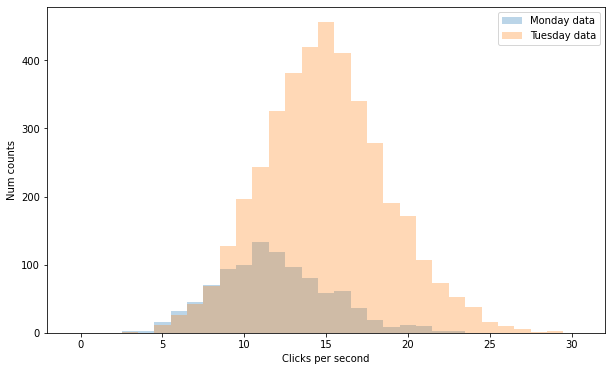

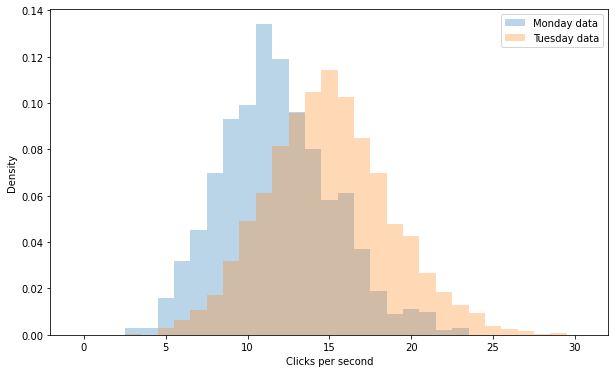

In [ ]:
dataset_location_2 = "counts_dataset_01.txt"

num_clicks_per_minute_2 = read_in_dataset(dataset_location_2)

# Unnormalized histograms
plt.figure()
plt.hist(num_clicks_per_minute, bins = clicks_per_minute_bin_edges, alpha = 0.3, density = False, label = "Monday data")
plt.hist(num_clicks_per_minute_2, bins = clicks_per_minute_bin_edges, alpha = 0.3, density = False, label = "Tuesday data")
plt.legend()
plt.xlabel("Clicks per second")
plt.ylabel("Num counts")
plt.show()

# Normalized histograms
plt.figure()
plt.hist(num_clicks_per_minute, bins = clicks_per_minute_bin_edges, alpha = 0.3, density = True, label = "Monday data")
plt.hist(num_clicks_per_minute_2, bins = clicks_per_minute_bin_edges, alpha = 0.3, density = True, label = "Tuesday data")
plt.legend()
plt.xlabel("Clicks per second")
plt.ylabel("Density")
plt.show()